In [14]:
# Reading .nc files from Colab/Thesis

# Importing libraries
import os
# Mount Google Drive (if you want to access files from Google Drive)
from google.colab import drive
drive.mount('/content/drive')
# Set the desired working directory
os.chdir('/content/drive/My Drive/Thesis')
# Verify the current working directory
print("Current working directory:", os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/My Drive/Thesis


NameError: name 'plt' is not defined

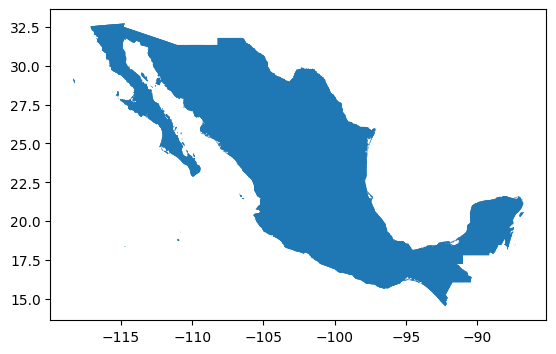

In [19]:
import geopandas as gpd
import os

# Define the base directory containing the shapefiles
base_dir = "GeoJson_Shapefiles/"

# Define a function to read and merge shapefiles
def read_merge_shapefiles(country):
    # Define the path to the directory containing shapefiles for the country
    country_dir = os.path.join(base_dir, f"gadm41_{country.upper()}_shp")
    # Get a list of all shapefiles in the directory
    shapefiles = [os.path.join(country_dir, f"gadm41_{country2.upper()}_{i}.shp") for i in range(3)]
    # Read and merge the shapefiles
    gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(shp) for shp in shapefiles], ignore_index=True), crs="EPSG:4326")
    return gdf

# List of countries
countries = ["MEXICO", "SALVADOR", "HONDURAS", "GUATEMALA"]
countries2 = ["MEX", "SLV", "HND", "GTM"]

# Read and merge shapefiles for each country
country_gdfs = {}
for country, country2 in zip(countries, countries2):
    country_gdfs[country] = read_merge_shapefiles(country)

# Example usage: plot administrative boundaries of Mexico
mexico_gdf = country_gdfs['MEXICO']
mexico_gdf.plot()
plt.title('Administrative Boundaries of Mexico')
plt.show()


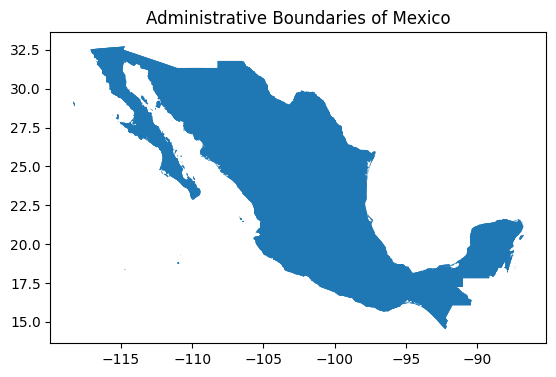

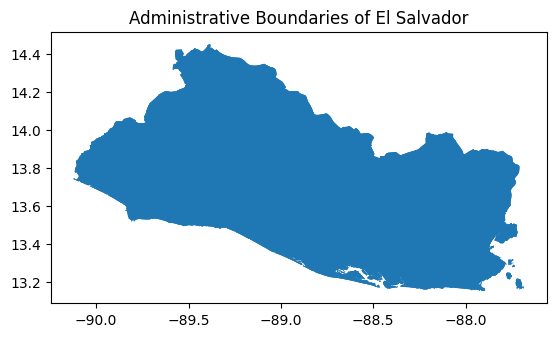

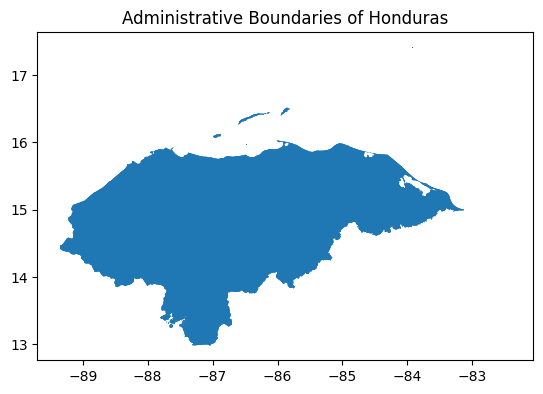

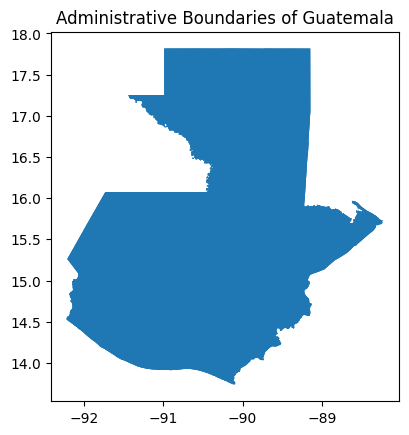

In [21]:
import matplotlib.pyplot as plt

# Read and merge shapefiles for each country and plot administrative boundaries
plt_Mexico = country_gdfs['MEXICO'].plot()
plt.title('Administrative Boundaries of Mexico')

plt_Salvador = country_gdfs['SALVADOR'].plot()
plt.title('Administrative Boundaries of El Salvador')

plt_Honduras = country_gdfs['HONDURAS'].plot()
plt.title('Administrative Boundaries of Honduras')

plt_Guatemala = country_gdfs['GUATEMALA'].plot()
plt.title('Administrative Boundaries of Guatemala')

plt.show()


In [23]:
import numpy as np

# Define a function to generate grid points within the bounding box of a country
def generate_grid_points(country_gdf, resolution):
    # Extract bounding box coordinates for the country
    min_lon, min_lat, max_lon, max_lat = country_gdf.total_bounds

    # Generate grid points within the bounding box
    lon_range = np.arange(min_lon, max_lon, resolution)
    lat_range = np.arange(min_lat, max_lat, resolution)

    # Generate all combinations of latitude and longitude pairs
    grid_points = [(lon, lat) for lon in lon_range for lat in lat_range]

    return grid_points

# Define the resolution for the grid
resolution = 0.1  # Degree

# Generate grid points for each country
grid_points_Mexico = generate_grid_points(country_gdfs['MEXICO'], resolution)
grid_points_Salvador = generate_grid_points(country_gdfs['SALVADOR'], resolution)
grid_points_Honduras = generate_grid_points(country_gdfs['HONDURAS'], resolution)
grid_points_Guatemala = generate_grid_points(country_gdfs['GUATEMALA'], resolution)

# Display the number of grid points for each country
print("Number of grid points for Mexico:", len(grid_points_Mexico))
print("Number of grid points for El Salvador:", len(grid_points_Salvador))
print("Number of grid points for Honduras:", len(grid_points_Honduras))
print("Number of grid points for Guatemala:", len(grid_points_Guatemala))
print("*******************************************")

# Example: Print the first few grid points for each country
print("Grid points for Mexico (first 5):", grid_points_Mexico[:5])
print("Grid points for El Salvador (first 5):", grid_points_Salvador[:5])
print("Grid points for Honduras (first 5):", grid_points_Honduras[:5])
print("Grid points for Guatemala (first 5):", grid_points_Guatemala[:5])


Number of grid points for Mexico: 57694
Number of grid points for El Salvador: 325
Number of grid points for Honduras: 3150
Number of grid points for Guatemala: 1640
Grid points for Mexico (first 5): [(-118.36648469, 14.535074242000064), (-118.36648469, 14.635074242000064), (-118.36648469, 14.735074242000064), (-118.36648469, 14.835074242000063), (-118.36648469, 14.935074242000063)]
Grid points for El Salvador (first 5): [(-90.12486267199995, 13.152640000000076), (-90.12486267199995, 13.252640000000076), (-90.12486267199995, 13.352640000000076), (-90.12486267199995, 13.452640000000075), (-90.12486267199995, 13.552640000000075)]
Grid points for Honduras (first 5): [(-89.35079193199988, 12.98453998600013), (-89.35079193199988, 13.084539986000129), (-89.35079193199988, 13.184539986000129), (-89.35079193199988, 13.284539986000128), (-89.35079193199988, 13.384539986000128)]
Grid points for Guatemala (first 5): [(-92.22235870399999, 13.738282203999972), (-92.22235870399999, 13.83828220399997

In [24]:
import csv

# Define the base directory containing the shapefiles
base_dir = "GeoJson_Shapefiles/"

# Define a function to export grid points to a CSV file
def export_grid_points_to_csv(grid_points, country, base_dir):
    # Define the filename based on the country
    filename = f"grid_lines_coord_{country.lower()}.csv"
    filepath = os.path.join(base_dir, filename)

    # Write the grid points to the CSV file
    with open(filepath, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Longitude', 'Latitude'])  # Write header
        writer.writerows(grid_points)  # Write grid points

# Export grid points to CSV files for each country
export_grid_points_to_csv(grid_points_Mexico, 'Mexico', base_dir)
export_grid_points_to_csv(grid_points_Salvador, 'Salvador', base_dir)
export_grid_points_to_csv(grid_points_Honduras, 'Honduras', base_dir)
export_grid_points_to_csv(grid_points_Guatemala, 'Guatemala', base_dir)
